**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Exploración de datos

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import seaborn as sns
sns.set_context('talk')

In [2]:
melb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')


## First Approach to the dataset

In [3]:
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,Abbotsford,40 Federation La,3,h,"850,000.00",PI,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
4,Abbotsford,55a Park St,4,h,"1,600,000.00",VB,Nelson,4/06/2016,2.50,"3,067.00",...,1.00,2.00,120.00,142.00,"2,014.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,"1,245,000.00",S,Barry,26/08/2017,16.70,"3,150.00",...,2.00,2.00,652.00,nan,"1,981.00",NaN,-37.91,145.17,South-Eastern Metropolitan,"7,392.00"
13576,Williamstown,77 Merrett Dr,3,h,"1,031,000.00",SP,Williams,26/08/2017,6.80,"3,016.00",...,2.00,2.00,333.00,133.00,"1,995.00",NaN,-37.86,144.88,Western Metropolitan,"6,380.00"
13577,Williamstown,83 Power St,3,h,"1,170,000.00",S,Raine,26/08/2017,6.80,"3,016.00",...,2.00,4.00,436.00,nan,"1,997.00",NaN,-37.85,144.89,Western Metropolitan,"6,380.00"
13578,Williamstown,96 Verdon St,4,h,"2,500,000.00",PI,Sweeney,26/08/2017,6.80,"3,016.00",...,1.00,5.00,866.00,157.00,"1,920.00",NaN,-37.86,144.89,Western Metropolitan,"6,380.00"


In [4]:
melb_df.shape

(13580, 21)

In [5]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
melb_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
melb_df.Suburb.value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Bacchus Marsh       1
Attwood             1
Croydon South       1
Upwey               1
Yarra Glen          1
Name: Suburb, Length: 314, dtype: int64

In [8]:
melb_df.Price.describe()

count      13,580.00
mean    1,075,684.08
std       639,310.72
min        85,000.00
25%       650,000.00
50%       903,000.00
75%     1,330,000.00
max     9,000,000.00
Name: Price, dtype: float64

## Representación de los ejemplos

La tarea sobre la que nos centraremos es **estimar el precio de cada propiedad**, sabiendo el resto de sus características.

El primer paso de todo análisis es realizar una exploración de los datos y analizar las distribuciones de sus variables. Es decir, aplicar las herramientas que hemos estudiado durante la materia anterior, [Análisis y Visualización de Datos](https://diplodatos.famaf.unc.edu.ar/analisis-y-visualizacion-de-datos/). Por este motivo, no entraremos en detalles en esta notebook, sino que será parte de la ejercitación práctica.

### Histograma + BoxPlot

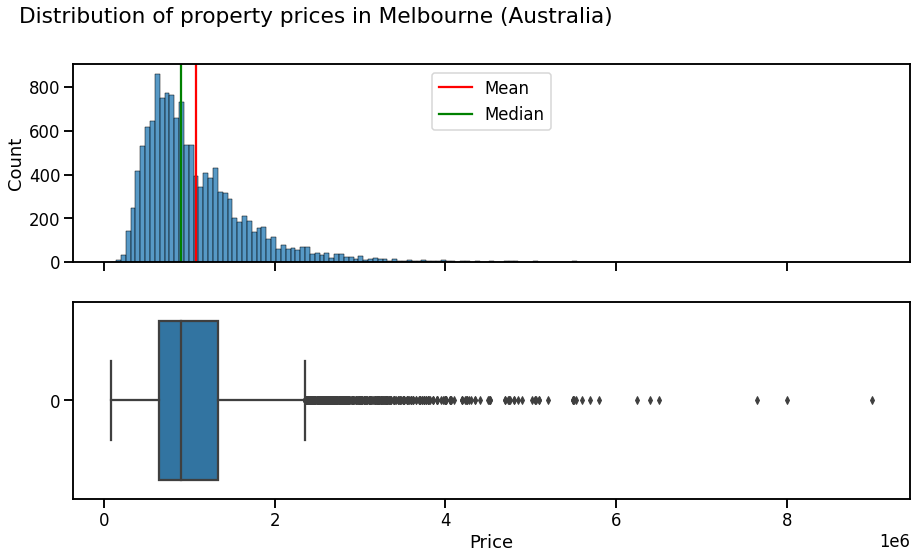

In [9]:
fig, axes = plt.subplots(nrows = 2,
                         ncols = 1,
                         figsize = (15,8))

plot1 = sns.histplot(ax = axes[0],
             data = melb_df.Price.dropna())
plot1.set(xlabel = None)
plot1.set(xticklabels = [])
plot1.axvline(x = melb_df.Price.dropna().mean(),
              color = 'red',
              label = 'Mean')

plot1.axvline(x = melb_df.Price.dropna().median(),
              color = 'green',
              label = 'Median')
plot1.legend(loc = 'upper center')

plt.suptitle('Distribution of property prices in Melbourne (Australia)',
             x = 0.35)

plot2 = sns.boxplot(ax = axes[1],
            data = melb_df.Price.dropna(),
            orient = 'h')
plot2.set(xlabel = 'Price')

plt.savefig('Figure #1.png', bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

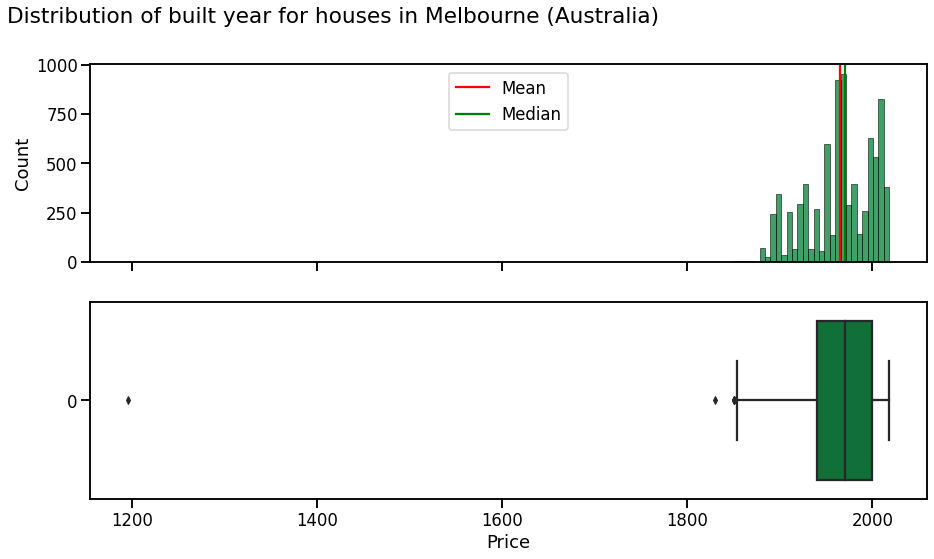

In [10]:
fig, axes = plt.subplots(nrows = 2,
                         ncols = 1,
                         figsize = (15,8))

plot1 = sns.histplot(ax = axes[0],
             data = melb_df.YearBuilt,
             color = '#018034')
plot1.set(xlabel = None)
plot1.set(xticklabels = [])
plot1.axvline(x = melb_df.YearBuilt.dropna().mean(),
              color = 'red',
              label = 'Mean')

plot1.axvline(x = melb_df.YearBuilt.dropna().median(),
              color = 'green',
              label = 'Median')
plot1.legend(loc = 'upper center')

plt.suptitle('Distribution of built year for houses in Melbourne (Australia)',
             x = 0.35)

plot2 = sns.boxplot(ax = axes[1],
            data = melb_df.YearBuilt,
            orient = 'h',
            color = '#018034')
plot2.set(xlabel = 'Price')

plt.savefig('Figure #2.png', bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

## Fechas

Las fechas representan la variable *tiempo*, que no es trivial de representar en mi conjunto de datos. 

* ¿Cómo afecta el tiempo al fenómeno que quiero estudiar?
* ¿Es importante de manera absoluta o de manera relativa?
* ¿Con qué nivel de precisión (o con qué escala) es relevante? ¿Años, días, minutos? ¿Importa la zona horaria?

Además de estas preguntas conceptuales, tenemos que tener en cuenta con qué tipo de datos (de Python) están representadas estas fechas:

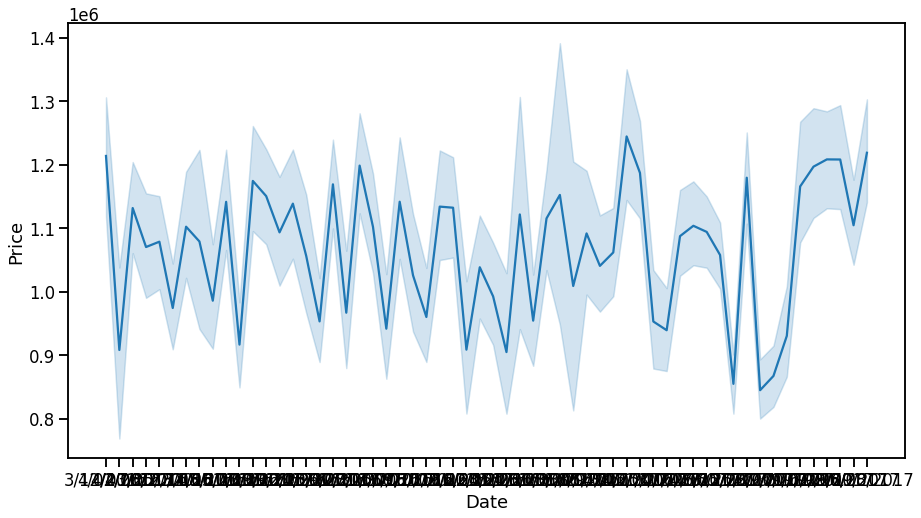

In [11]:
fig = plt.figure(figsize = (15,8))

sns.lineplot(data = melb_df,
             x = 'Date',
             y = 'Price')
plt.show()


Clarmente los datos mostrados en el eje x son ilegible. Eso emn parte se debe a que las fechas fueron reconocidas como strings. Para mejorar la visulaizacion de estos datos podemos cambiar el tipo de datos a `datetime`, que es una estructura de datos diseñada para trabajar con fechas hasta una precisión de milisegundos.

In [12]:
# agregamos una columan que se llame date que tenga la info de la columna Date pero como tipo de dato datetime
melb_df['date'] = pd.to_datetime(melb_df['Date'])

In [13]:
melb_df.shape
# vemos que sea grego una columna al df

(13580, 22)

In [14]:
melb_df[['Date','date']]

,Date,date
0,3/12/2016,2016-03-12
1,4/02/2016,2016-04-02
2,4/03/2017,2017-04-03
3,4/03/2017,2017-04-03
4,4/06/2016,2016-04-06
...,...,...
13575,26/08/2017,2017-08-26
13576,26/08/2017,2017-08-26
13577,26/08/2017,2017-08-26
13578,26/08/2017,2017-08-26


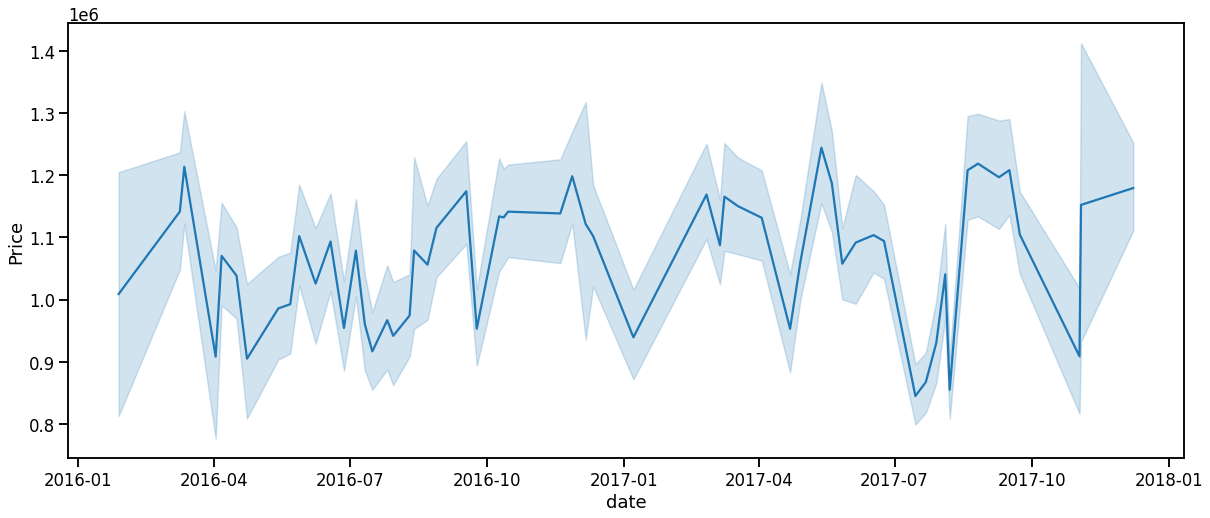

In [15]:
fig = plt.figure(figsize = (20,8))

sns.lineplot(data = melb_df,
             x = 'date',
             y = 'Price')
plt.savefig('Figure #3.png', bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

Muchas veces cuando analizamos datos relacionados con fechas (por ejemplo precios de activos financiero en funcion del tiempo) la presicion con que esta definido el eje x puede atentar contra el analisis de datos. en este caso, utilizr una precision de dias para graficar la variable fecha puede hacer que se introduzca demasiado ruido al analisis.
Vamos a generar una nueva columna que solo tega los datos de anio y mes.

In [16]:
melb_df['date_month'] = pd.to_datetime(melb_df.date.dt.strftime('%Y-%m'))


In [17]:
melb_df[['Date', 'date', 'date_month']]

,Date,date,date_month
0,3/12/2016,2016-03-12,2016-03-01
1,4/02/2016,2016-04-02,2016-04-01
2,4/03/2017,2017-04-03,2017-04-01
3,4/03/2017,2017-04-03,2017-04-01
4,4/06/2016,2016-04-06,2016-04-01
...,...,...,...
13575,26/08/2017,2017-08-26,2017-08-01
13576,26/08/2017,2017-08-26,2017-08-01
13577,26/08/2017,2017-08-26,2017-08-01
13578,26/08/2017,2017-08-26,2017-08-01


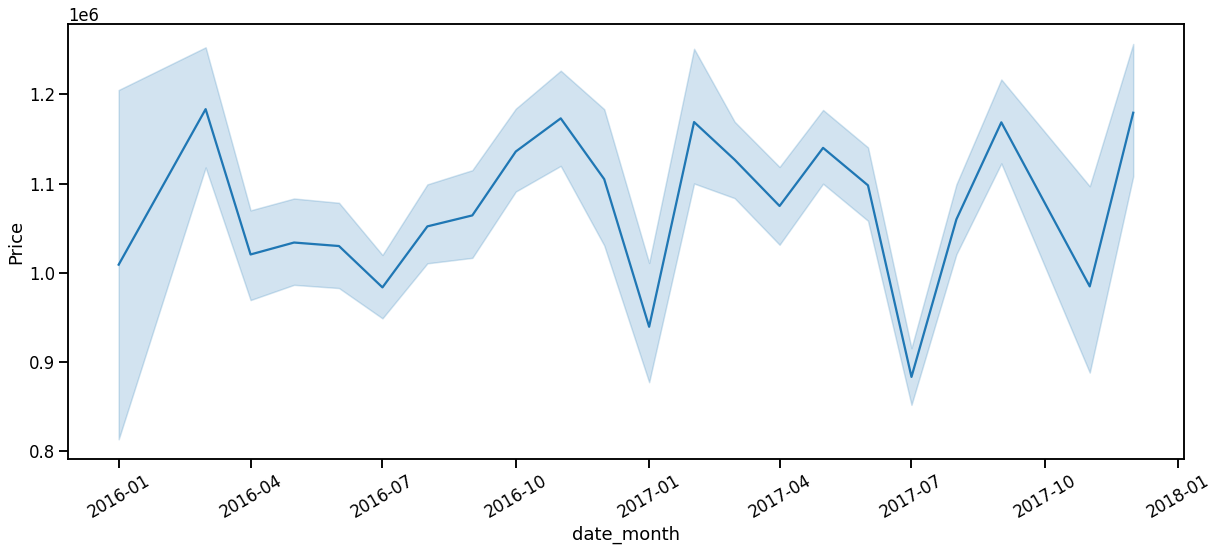

In [18]:
fig = plt.figure(figsize = (20,8))

sns.lineplot(data = melb_df.sort_values('date_month'),
             x = 'date_month',
             y = 'Price')
plt.xticks(rotation = 30)

plt.savefig('Figure #4.png', bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

## Ejercicio

En lugar de utilizar una precisión de meses, utilizar cuatrimestres para representar la fecha. Realizar una visualización del cambio de precios con respecto al año y al cuatrimestre.

Nota: investigue si existe una función en pandas para esto.

In [19]:
import datetime as dt


In [20]:
melb_df['date_quarter'] = melb_df['date'].dt.to_period('Q') 

#df['Quarter_Info'] = df['Date'].dt.to_period('Q')
# pandas.Timestamp(2016,4,29).quarter

In [21]:
melb_df[['Date', 'date', 'date_month', 'date_quarter']]

,Date,date,date_month,date_quarter
0,3/12/2016,2016-03-12,2016-03-01,2016Q1
1,4/02/2016,2016-04-02,2016-04-01,2016Q2
2,4/03/2017,2017-04-03,2017-04-01,2017Q2
3,4/03/2017,2017-04-03,2017-04-01,2017Q2
4,4/06/2016,2016-04-06,2016-04-01,2016Q2
...,...,...,...,...
13575,26/08/2017,2017-08-26,2017-08-01,2017Q3
13576,26/08/2017,2017-08-26,2017-08-01,2017Q3
13577,26/08/2017,2017-08-26,2017-08-01,2017Q3
13578,26/08/2017,2017-08-26,2017-08-01,2017Q3


In [22]:
melb_df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date                     object
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
date             datetime64[ns]
date_month       datetime64[ns]
date_quarter      period[Q-DEC]
dtype: object